# Assignment 5

## 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
## 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
## 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

### 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the
+ Training Error (MSE, MAE)
+ Testing Error (MSE, MAE)

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [4]:
def load_and_preprocess(filepath):
    """Load and preprocess the bikeshare data."""
    data = pd.read_csv(filepath)
    data['start'] = pd.to_datetime(data['Start date']) # Convert 'Start date' column to datetime format.
    data['end'] = pd.to_datetime(data['End date']) # Convert 'End date' column to datetime format.
    data['dur'] = data['Duration (ms)'].astype(int) # Convert 'Duration (ms)' column to integer type.
    data['log_dur'] = np.log1p(data['dur']) # Calculate the natural logarithm of 'dur' plus one to avoid log(0).
    data['hour'] = data['start'].dt.hour # Extract the hour from the 'start' datetime column.
    data['day_of_week'] = data['start'].dt.dayofweek # Extract the day of the week from the 'start' datetime column.
    data['month'] = data['start'].dt.month # Extract the month from the 'start' datetime column.
    return data

bikes = load_and_preprocess('bikeshare.csv')
print(bikes.head())


   Duration (ms)       Start date         End date  Start station number  \
0         301295  3/31/2016 23:59    4/1/2016 0:04                 31280   
1         557887  3/31/2016 23:59    4/1/2016 0:08                 31275   
2         555944  3/31/2016 23:59    4/1/2016 0:08                 31101   
3         766916  3/31/2016 23:57    4/1/2016 0:09                 31226   
4         139656  3/31/2016 23:57  3/31/2016 23:59                 31011   

                    Start station  End station number  \
0                  11th & S St NW               31506   
1  New Hampshire Ave & 24th St NW               31114   
2                  14th & V St NW               31221   
3      34th St & Wisconsin Ave NW               31214   
4               23rd & Crystal Dr               31009   

                 End station Bike number Member Type               start  \
0  1st & Rhode Island Ave NW      W00022  Registered 2016-03-31 23:59:00   
1   18th St & Wyoming Ave NW      W01294  Regist

In [5]:
def build_model(data):
    """Build and evaluate a regression model using a pipeline."""
    # Features for the model
    features = ['hour', 'day_of_week', 'month', 'dur'] 
    # Preprocessing: OneHotEncoder for categorical features
    categorical_features = ['hour', 'day_of_week', 'month']
    numeric_features = ['dur']
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features),
            ('num', 'passthrough', numeric_features)
        ])

    # Create a pipeline with preprocessing and a simpler linear model
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge())  # Using Ridge regression for potentially faster execution and handling multicollinearity
    ])

    # Data preparation
    X = data[features]
    y = data['log_dur']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model fitting and evaluation
    model.fit(X_train, y_train)
    evaluate_model(model, X_train, y_train, X_test, y_test)

In [6]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Evaluate the model and print metrics."""
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('Training MSE:', mean_squared_error(y_train, y_train_pred))
    print('Testing MSE:', mean_squared_error(y_test, y_test_pred))
    print('Training MAE:', mean_absolute_error(y_train, y_train_pred))
    print('Testing MAE:', mean_absolute_error(y_test, y_test_pred))
    print('Training R²:', r2_score(y_train, y_train_pred))
    print('Testing R²:', r2_score(y_test, y_test_pred))

if __name__ == "__main__":
    bikes = load_and_preprocess('bikeshare.csv')
    build_model(bikes)



Training MSE: 0.4348335196829379
Testing MSE: 0.426426141253271
Training MAE: 0.504092519502066
Testing MAE: 0.5026948487527051
Training R²: 0.3528374257882352
Testing R²: 0.36385574577063085


The revised regression model was redesigned to improve performance by using a simplified linear approach (Ridge regression) that is generally quicker and more stable, especially when dealing with features that exhibit multicollinearity. Ridge regression was chosen to handle possible overfitting and provide better generalization over the dataset compared to a computationally heavier model like a random forest, which was used previously and might have contributed to longer runtimes and poor scalability. This change aimed at achieving better model training times and predictive performance.


### 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate
+ Accuracy
+ Confusion Matrix
+ Classifcation Report

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')


In [8]:
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [9]:
# Split the data into features and target variable
X = data.drop('quality', axis=1)  # Replace 'target_column' with the actual name of your target column
y = data['quality']  # Target column for classification

In [10]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion='entropy')

In [12]:
# Fit the model on training data
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [13]:
# Predict on the test data
predictions = model.predict(X_test)

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

# Print model evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.559375
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  7  2  1  0]
 [ 1  7 84 32  6  0]
 [ 0  2 40 73 15  2]
 [ 0  1  3 15 22  1]
 [ 0  0  0  4  1  0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.62      0.65      0.63       130
           6       0.58      0.55      0.57       132
           7       0.49      0.52      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.28      0.29      0.28       320
weighted avg       0.56      0.56      0.56       320



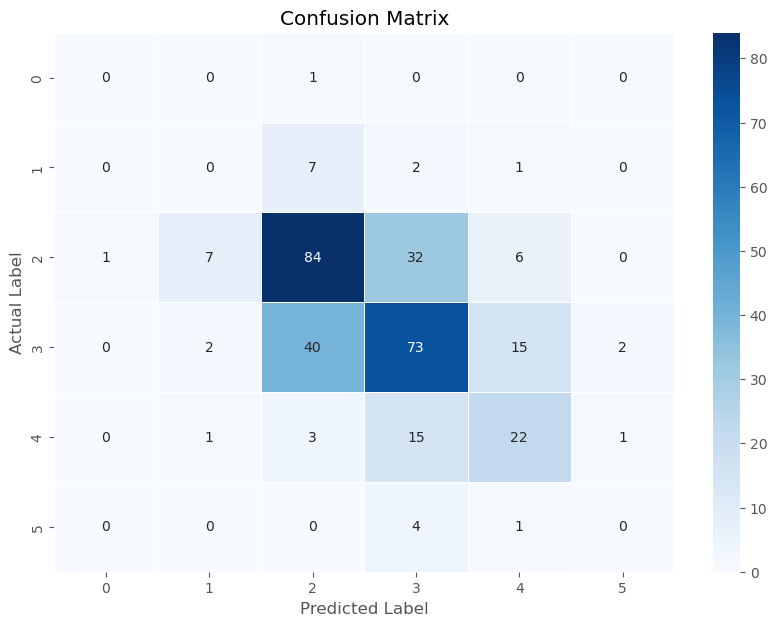

In [15]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [16]:
# Predictions on training set for evaluating overfitting
predictions_train = model.predict(X_train)

# Evaluate predictions on the training set
train_accuracy = accuracy_score(y_train, predictions_train)
train_conf_mat = confusion_matrix(y_train, predictions_train)
train_class_report = classification_report(y_train, predictions_train)

print("Training Accuracy:", train_accuracy)
print("Training Confusion Matrix:\n", train_conf_mat)
print("Training Classification Report:\n", train_class_report)

Training Accuracy: 1.0
Training Confusion Matrix:
 [[  9   0   0   0   0   0]
 [  0  43   0   0   0   0]
 [  0   0 551   0   0   0]
 [  0   0   0 506   0   0]
 [  0   0   0   0 157   0]
 [  0   0   0   0   0  13]]
Training Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        43
           5       1.00      1.00      1.00       551
           6       1.00      1.00      1.00       506
           7       1.00      1.00      1.00       157
           8       1.00      1.00      1.00        13

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



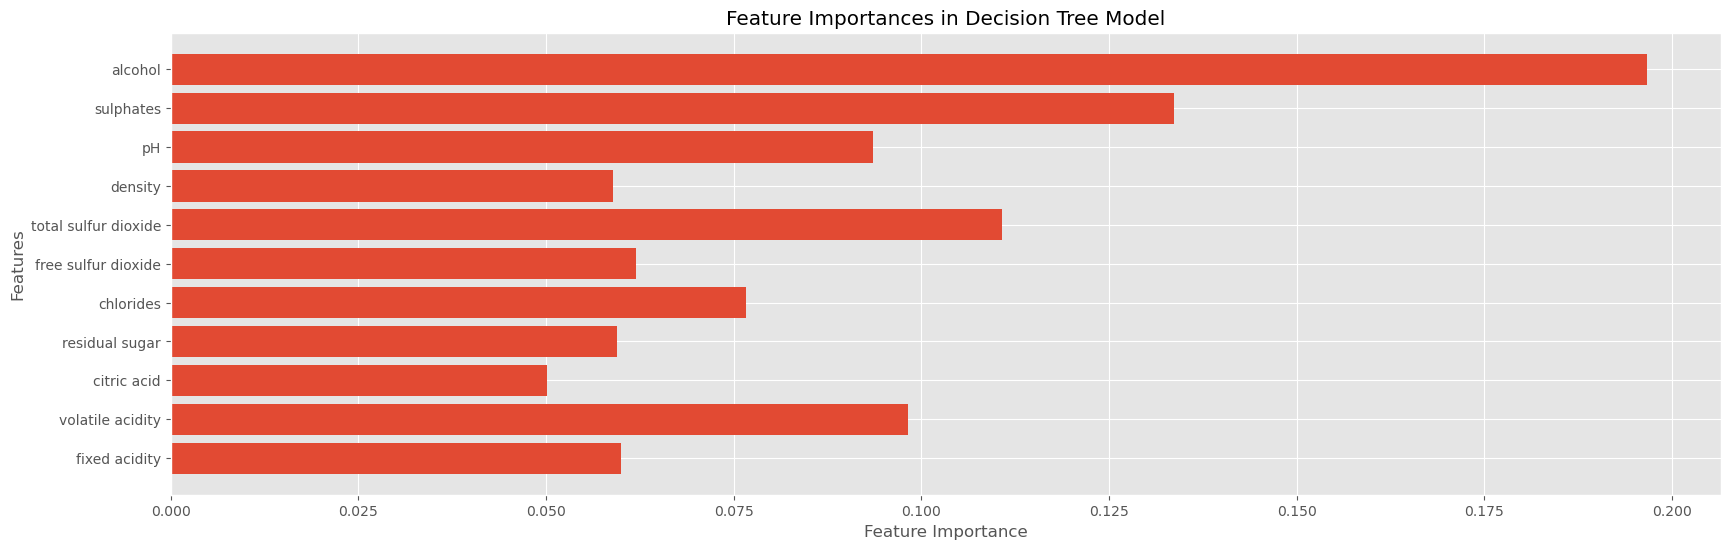

In [19]:
# Retrieve feature importances
feature_importances = model.feature_importances_

# Plot feature importances
plt.barh(np.arange(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Decision Tree Model')
plt.show()

In [27]:
# Using cross_validate to perform n-fold validations
from sklearn.model_selection import train_test_split, cross_validate

cv_results = cross_validate(model, X, y, cv=20, 
                            scoring=['accuracy', 'recall_macro', 'precision_macro', 'f1_macro'],
                            return_train_score=True)
print(cv_results)

{'fit_time': array([0.02223396, 0.02109408, 0.02173495, 0.02065206, 0.02005792,
       0.02099085, 0.02099204, 0.02200007, 0.02135396, 0.02024603,
       0.02109218, 0.02100611, 0.02083302, 0.02051806, 0.02110791,
       0.02018094, 0.02032733, 0.01966524, 0.02011228, 0.02117515]), 'score_time': array([0.00933719, 0.00876188, 0.00892329, 0.009022  , 0.00878286,
       0.00880814, 0.00857019, 0.0084269 , 0.0084722 , 0.0085032 ,
       0.00811005, 0.00852489, 0.00810003, 0.00848198, 0.00835395,
       0.00811481, 0.00807691, 0.00808883, 0.00800896, 0.00798988]), 'test_accuracy': array([0.4       , 0.4875    , 0.4625    , 0.575     , 0.475     ,
       0.4875    , 0.4375    , 0.5       , 0.575     , 0.525     ,
       0.5       , 0.575     , 0.475     , 0.6375    , 0.3625    ,
       0.4875    , 0.575     , 0.3875    , 0.425     , 0.48101266]), 'train_accuracy': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.]), 'test_recall_macro': array([0.23

### 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

In [28]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize the PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, include_bias=False)

# Create polynomial features
X_poly = poly.fit_transform(X)

# Split the transformed data
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)


In [30]:
from sklearn.model_selection import GridSearchCV

# Define the model and parameters
model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Setup the grid search
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit grid search
grid.fit(X_train_scaled, y_train)

# Use the best estimator
best_tree = grid.best_estimator_

# Predict on the test data using the best model
predictions = best_tree.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print("Best Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Best Model Accuracy: 0.540625
Confusion Matrix:
 [[ 0  0  0  1  0  0]
 [ 1  2  4  3  0  0]
 [ 2  5 95 26  2  0]
 [ 0  2 58 59 13  0]
 [ 0  0  5 19 17  1]
 [ 0  0  1  2  2  0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.22      0.20      0.21        10
           5       0.58      0.73      0.65       130
           6       0.54      0.45      0.49       132
           7       0.50      0.40      0.45        42
           8       0.00      0.00      0.00         5

    accuracy                           0.54       320
   macro avg       0.31      0.30      0.30       320
weighted avg       0.53      0.54      0.53       320



In [31]:
# Predictions on training set for evaluating overfitting
train_predictions = best_tree.predict(X_train_scaled)

# Evaluate predictions on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
train_conf_mat = confusion_matrix(y_train, train_predictions)
train_class_report = classification_report(y_train, train_predictions)

print("Training Accuracy:", train_accuracy)
print("Training Confusion Matrix:\n", train_conf_mat)
print("Training Classification Report:\n", train_class_report)


Training Accuracy: 0.8944487881157154
Training Confusion Matrix:
 [[  8   0   1   0   0   0]
 [  0  23  13   7   0   0]
 [  0   2 535  14   0   0]
 [  0   0  69 436   1   0]
 [  0   0   7  17 133   0]
 [  0   0   3   1   0   9]]
Training Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.89      0.94         9
           4       0.92      0.53      0.68        43
           5       0.85      0.97      0.91       551
           6       0.92      0.86      0.89       506
           7       0.99      0.85      0.91       157
           8       1.00      0.69      0.82        13

    accuracy                           0.89      1279
   macro avg       0.95      0.80      0.86      1279
weighted avg       0.90      0.89      0.89      1279



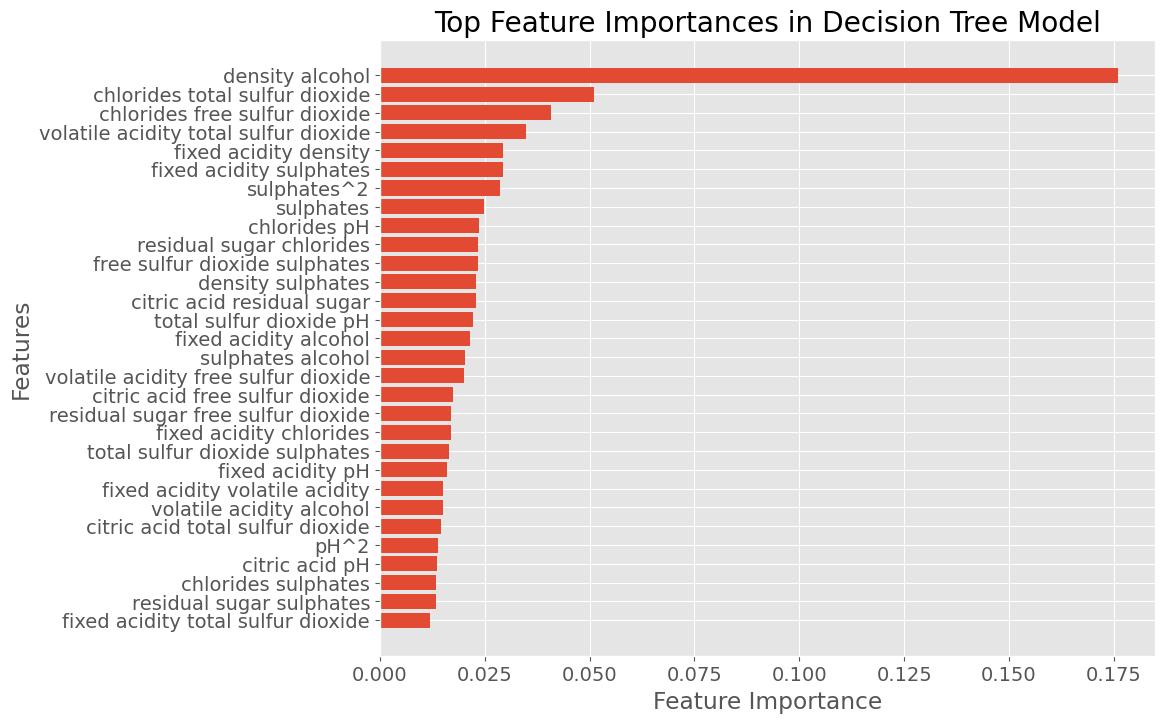

In [33]:
# Retrieve feature importances and sort them
sorted_idx = np.argsort(feature_importances)
top_n = 30  # Show top 30 features, or choose another appropriate cutoff
sorted_idx_top = sorted_idx[-top_n:]

# Plot feature importances of the top n
plt.figure(figsize=(10, 8))  # Larger figure size
plt.barh(range(top_n), feature_importances[sorted_idx_top], align='center')
plt.yticks(range(top_n), np.array(poly.get_feature_names_out())[sorted_idx_top])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top Feature Importances in Decision Tree Model')
plt.show()
